# run on Jose's computer

In [1]:
import os, sys, glob, pylab as pl, h5py, pdb
#from importlib import reload
sys.path.append('./pysrc_new/')
sys.path.append('./forCHIMES/')
import numpy as np
from numpy import log10 as log
from astropy import units as un, constants as cons
import parameters as param
import RPC_Hydro as proj
import plots

NameError: name 'chimes_cross_sections_dir' is not defined

In [2]:
# fn_abundances = proj.rpc_hydro_dir+'forCHIMES/eqm_external_shielding_table_abundances_%s0s.hdf5'%sim_prefix
fn_abundances = proj.rpc_hydro_dir+'forCHIMES/eqm_external_shielding_table_abundances.hdf5'
fn_static_solution = proj.rpc_hydro_dir+'forCHIMES/static_solution.npz'
f_abundances = h5py.File(fn_abundances,'r')

In [3]:
sim_resolution = '1024'
sim_prefix = '600'
sim_suffix = 'DL'
lum = 2.5e12 * un.Lsun.to('erg/s')
name = 'B2D_N%s_R100_%s%s'%(sim_resolution,sim_prefix,sim_suffix)
sim_data_name = proj.runsDir+name+'/data/'
nSnapshots = max([int(fn.split('.')[1]) for fn in glob.glob(sim_data_name+'prs*')])
qRP = proj.Run(name,nSnapshots,r=100.,v0=un.pc.to('cm')/un.yr.to('s'),L0=un.pc.to('cm'),
           rho0=1e-20,L=lum,optFrac=param.ion_fraction,
              f_abundances=f_abundances)
print(nSnapshots)

630


In [5]:
sim_resolution = '1024' #2048
sim_prefix = '601'#'501'#'421'
sim_suffix = 'DL'#'V' #'D'
lum = 2.5e9 * un.Lsun.to('erg/s')
name = 'B2D_N%s_R100_%s%s'%(sim_resolution,sim_prefix,sim_suffix)
sim_data_name = proj.runsDir+name+'/data/'
nSnapshots = max([int(fn.split('.')[1]) for fn in glob.glob(sim_data_name+'prs*')])
qGP = proj.Run(name,nSnapshots,r=100.,v0=un.pc.to('cm')/un.yr.to('s'),L0=un.pc.to('cm'),
           rho0=1e-20,L=lum,optFrac=param.ion_fraction,
              f_abundances=f_abundances)
print(nSnapshots)

2130


loading snapshot #0
loading snapshot #100
loading snapshot #200
loading snapshot #300
loading snapshot #0
loading snapshot #100
loading snapshot #200
loading snapshot #300


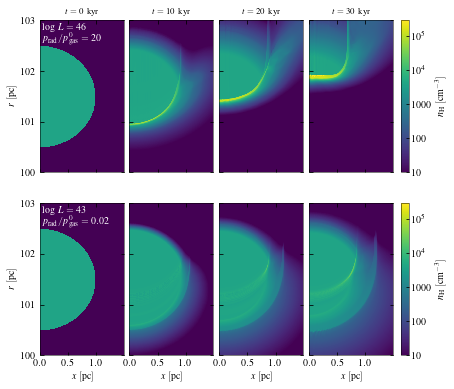

In [6]:
#reload(plots); plots.labelsize(False)
iSnapshots = [0,100,200,300]
cb = plots.sim_evolution((qRP,qGP),iSnapshots,'nH',rng=(10,3e5),cmap=plots.density_cmap)    
pl.savefig(plots.figdir+'density_evolution_%s.png'%sim_suffix,dpi=300,bbox_inches='tight')

loading snapshot #500


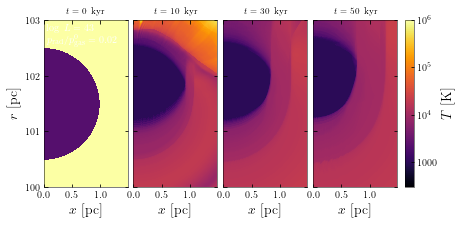

In [7]:
reload(plots); plots.labelsize(False)
iSnapshots = [0,100,300,500]
cb = plots.sim_evolution((qGP,),iSnapshots,'T',rng=(300,1e6),cmap=plots.temperature_cmap)    
pl.savefig(plots.figdir+'temperature_evolution_%s.png'%qGP.name,dpi=300,bbox_inches='tight')

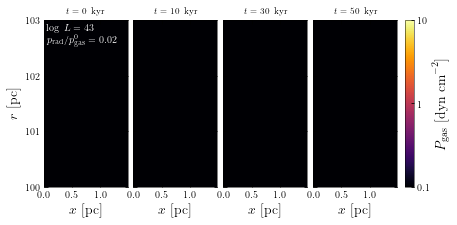

In [8]:
reload(plots); plots.labelsize(False)
iSnapshots = [0,100,300,500]
cb = plots.sim_evolution((qGP,),iSnapshots,'P',rng=(0.1,10),cmap=plots.temperature_cmap)    
# pl.savefig(plots.figdir+'temperature_evolution.png',dpi=300,bbox_inches='tight')

In [9]:
#reload(plots); 
plots.labelsize(False)
iSnapshots = [0,10,100,300]
cb = plots.sim_evolution((qRP,qGP),iSnapshots,'T',rng=(10,1e6),cmap=plots.temperature_cmap)    
#pl.savefig(plots.figdir+'temperature_evolution.png',dpi=300,bbox_inches='tight')

loading snapshot #10
loading snapshot #10


loading snapshot #1
loading snapshot #5
loading snapshot #1
loading snapshot #5


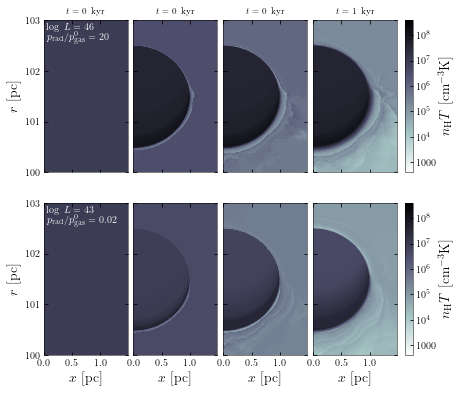

In [10]:
#reload(plots); plots.labelsize(False)
iSnapshots = [0,1,5,10]
cb = plots.sim_evolution((qRP,qGP),iSnapshots,'nHT',rng=(400,4e8),cmap=plots.pressure_cmap,layout=0)    
pl.savefig(plots.figdir+'pressure_evolution.png',dpi=300,bbox_inches='tight')

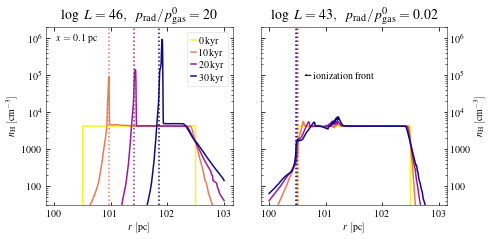

In [15]:
reload(plots)
iSnapshots = [0,100,200,300]
ix = 34
plots.skewers((qRP,qGP),'r',('nH',),rngs=((30,2e6),(3e4,1e10)), iTs=iSnapshots,ix=ix)
pl.savefig(plots.figdir+'skewers_vs_dr.pdf',bbox_inches='tight')

In [16]:
print('shell velocity: %.1f km/s'%(un.pc/(20*un.kyr)).to('km/s').value)
# Pram = Prad
# rho v^2 = Prad
# v = sqrt(Prad/rho)
print('shell expected velocity, from Prad=Pram: %.1f km/s'% 
      ((0.5*1e46 * un.erg/un.s / (4*np.pi*101**2*un.pc**2*cons.c) / (4000*un.cm**-3 * cons.m_p))**0.5).to('km/s').value)

shell velocity: 48.9 km/s
shell expected velocity, from Prad=Pram: 45.2 km/s


In [17]:
#accleration time t = v/a
(50*un.km/un.s / (0.5e-4*un.cm*un.s**-2)).to('yr')

<Quantity 3168.8087814 yr>

In [18]:
G0 = lambda s: 8*s/(3*np.pi**0.5)*(1+9*np.pi/64*s**2)**0.5
G2 = lambda s: s / (3*np.pi**0.5 / 4 + s**3)


In [19]:
G0(1),G2(1)

(1.8065262158125652, 0.4293060838487876)

In [20]:
#F_drag = m_gr a_rad = m_gr * 5e-2
#m_gr = 4pi a^3/3 rho
#F_drag = 2 pi a^2 kT nH (...)
#F_drag/m_g = 3/2 kT/a nH/rho (...)
#U=1 -> a = 5e-2, n_H=1000
#phi = U in Volt / T in 10^4K
# charge distribution vs. U, T, from figs 6-7 in Weingartner+2006
# F_drag from Draine&Salpeter 1979, Draine2011
PotentialInVolt = 30
T_4 = 5
s = 1 #drift mach number, need to solve for this
(G0(s)+G2(s)*15 * PotentialInVolt**2 *T_4**-2)* (3/2*cons.k_B*1e4*un.K*T_4 / (0.1*un.micron) * 1e3*un.cm**-3 / (3*un.g*un.cm**-3)).to('cm*s**-2') / (5e-2*un.cm/un.s**2)

<Quantity 1.07521138>

In [21]:
s=0.5
(G0(s),G2(s)*15 * PotentialInVolt**2 *T_4**-2)

(0.7927069080716509, 185.65117368296796)

In [22]:
np.log(3/2.*((cons.k_B*1e4*un.K/(1e4*un.cm**-3))**0.5 /(0.1*un.micron*4.8e-10*un.statcoulomb)).to(''))

<Quantity 15.11622151>

In [23]:
(30*1.6e-12*un.erg / (cons.k_B*1e4*un.K)).to('')

<Quantity 34.76627056>

In [24]:
1.6e-19*un.J / (cons.k_B * 1e4*un.K).to('J')

<Quantity 1.15887569>

In [21]:
#reload(plots)
iSnapshots = [1,50,100,200,300]
ix = 17
plots.skewers((qRP,qGP),'r',('T',),rngs=((10,1e7)), iTs=iSnapshots,ix=ix)
#pl.savefig(plots.figdir+'skewers_vs_dr_T_%s.pdf'%sim_suffix,bbox_inches='tight')

loading snapshot #50
loading snapshot #50


In [22]:
(cons.k_B * 1e6*un.K / (1e-4*0.2e-22*un.erg/un.s)).to('Gyr')

<Quantity 2.18750558 Gyr>

In [23]:
static_solution = np.load(fn_static_solution)
#pl.loglog(static_solution['taus'],static_solution['Ts'])
pl.title('static temperature solution')
pl.xlabel(r'$\tau\ (1\ {\rm ryd})$')
pl.ylabel(r'$T\ [{\rm K}]$')
pl.xlim(0.01,100)
pl.gca().xaxis.set_major_formatter(plots.arilogformatter)
run = qRP; iT = 20; ix = 17
taus = run[iT].tau_HI.cgs()[:,ix] + run[iT].tau_dust.cgs()[:,ix]
Ts = run[iT].T.cgs()[:,ix]
pl.plot(taus, Ts,label='sim')
pl.loglog(static_solution['NHIs']*param.sigma_HI_one_rydberg
          +static_solution['NHs']*param.sigma_dust_one_rydberg,static_solution['Ts'],ls='--',c='k',label='static')
pl.ylim(1e4,4e5)
pl.legend()

loading snapshot #20


In [24]:
qRP.n_gamma(), 10**param.lng*100

(<Quantity 1256.30602568 1 / cm3>, 1312.7544677938931)

In [33]:
qRP[0].T.cgs()[:,34].min()

2216.0018973123124

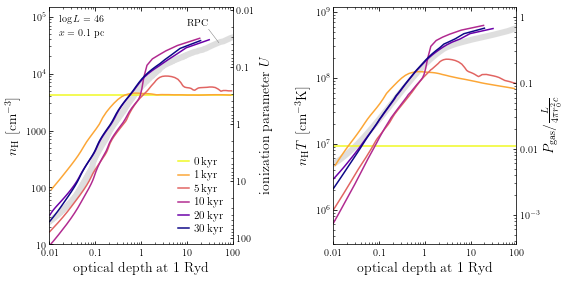

In [15]:
reload(plots)
ix = 34
fn_static_solution = plots.rpc_hydro_dir + 'forCHIMES/static_solution.npz'
plots.comparison_to_static_solution_by_time(
    qRP,iTs=(0,10,50,100,200,300),var=('nH','nHT'),ix=ix,
    static_solution_fn=fn_static_solution)
pl.savefig(plots.figdir+'comparison_to_static_solution_by_time_%s.pdf'%qRP.name,bbox_inches='tight')

loading snapshot #30


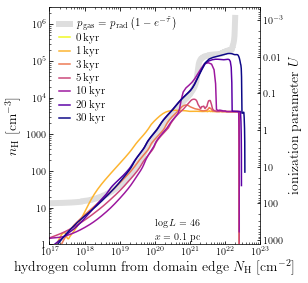

In [26]:
reload(plots)
fn_static_solution = plots.rpc_hydro_dir + 'forCHIMES/static_solution.npz'
plots.comparison_to_static_solution_by_time_vs_NH(
    qRP,iTs=(0,10,30,50,100,200,300),var='nH',rng=(10,1.5e5),ix=ix,
    static_solution_fn=fn_static_solution)
pl.savefig(plots.figdir+'comparison_to_static_solution_by_time_vs_NH_%s.pdf'%qRP.name,bbox_inches='tight')

In [27]:
sim_resolution = '2048'
sim_prefix = '600'
sim_suffix = 'D'
lum = 2.5e12 * un.Lsun.to('erg/s')
name = 'B2D_N%s_R100_%s%s'%(sim_resolution,sim_prefix,sim_suffix)
sim_data_name = proj.runsDir+name+'/data/'
nSnapshots = max([int(fn.split('.')[1]) for fn in glob.glob(sim_data_name+'prs*')])
qRP_highres = proj.Run(name,nSnapshots,r=100.,v0=un.pc.to('cm')/un.yr.to('s'),L0=un.pc.to('cm'),
           rho0=1e-20,L=lum,optFrac=param.ion_fraction,
              f_abundances=f_abundances)
print(nSnapshots)

139


In [5]:
reload(plots)
tables_oxygen = plots.IonizationTables(f_abundances,'O',8)
tables_iron = plots.IonizationTables(f_abundances,'Fe',26)

OIX
OVIII
OVII
OI
FeXVIII
FeVIII
FeII


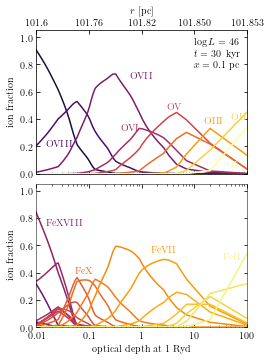

In [8]:
reload(plots)
iT=300
ix = 34
plots.plotIonizationStatesSim(qRP,iT,ix,tables_oxygen,tables_iron)

In [7]:
reload(proj)
sim_resolution = '1024'
sim_prefix = '600'
sim_suffix = 'DL'
lum = 2.5e12 * un.Lsun.to('erg/s')
name = 'B2D_N%s_R100_%s%s'%(sim_resolution,sim_prefix,sim_suffix)
sim_data_name = proj.runsDir+name+'/data/'
nSnapshots = max([int(fn.split('.')[1]) for fn in glob.glob(sim_data_name+'prs*')])
qRP = proj.Run(name,nSnapshots,r=100.,v0=un.pc.to('cm')/un.yr.to('s'),L0=un.pc.to('cm'),
           rho0=1e-20,L=lum,optFrac=param.ion_fraction,
              f_abundances=f_abundances)
print(nSnapshots)

630


In [38]:
reload(plots)
plots.labelsize(False)
plots.comparison_to_static_solution_by_x(
    qRP,iT=300,var='nH',rng=(10,1.5e5),
    ixs=np.array([34,68,136,204,306,408]),dx=10,
    static_solution_fn=fn_static_solution)
pl.savefig(plots.figdir+'comparison_to_static_solution_by_x_%s.png'%qRP.name,dpi=300,bbox_inches='tight')

[1.0e+01 1.5e+05]
(10.0, 150000.0)


(1e+21, 1e+35)

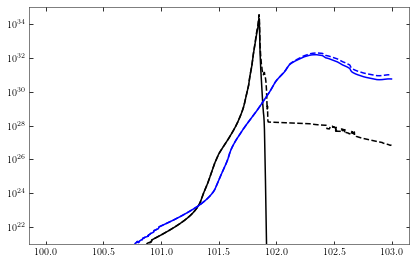

In [36]:
pl.plot(snapshot.r.cgs(),snapshot.LHa.cgs()[:,34],c='k')
pl.plot(snapshot.r.cgs(),snapshot.LHa_noExtinct.cgs()[:,34],c='k',ls='--')
pl.plot(snapshot.r.cgs(),snapshot.LHa.cgs()[:,306],c='b')
pl.plot(snapshot.r.cgs(),snapshot.LHa_noExtinct.cgs()[:,306],c='b',ls='--')
pl.semilogy()
pl.ylim(1e21,1e35)

# load different L and r sims

In [4]:
sim_resolution = '1024'
sim_prefix = '600'
sim_suffixes = 'D','DL'
lums = np.array([2.5]*7+[7.5]*3) * 10.**np.array([12,9,10,11,13,8,14,12,11,10])*un.Lsun.to('erg/s')
names = ['B2D_N%s_R100_%s%d%s'%(sim_resolution,sim_prefix[:-1],i,sim_suffixes[i<2]) for i in range(len(lums))]
sim_data_names = [proj.runsDir+names[i]+'/data/' for i in range(len(lums))]

In [5]:
names

['B2D_N1024_R100_600DL',
 'B2D_N1024_R100_601DL',
 'B2D_N1024_R100_602D',
 'B2D_N1024_R100_603D',
 'B2D_N1024_R100_604D',
 'B2D_N1024_R100_605D',
 'B2D_N1024_R100_606D',
 'B2D_N1024_R100_607D',
 'B2D_N1024_R100_608D',
 'B2D_N1024_R100_609D']

In [6]:
sim_data_names = np.array(sim_data_names)[lums.argsort()].tolist()
names = np.array(names)[lums.argsort()].tolist()

In [7]:
lums = np.sort(lums)

In [8]:
nSnapshots = [None]*len(lums)
for i in range(len(lums)):
    if os.path.exists(sim_data_names[i]):
        nSnapshots[i] = max([int(fn.split('.')[1]) for fn in glob.glob(sim_data_names[i]+'prs*')])

In [9]:
[(sim_data_names[i].split('/')[-3],'%.1f'%log(lums[i]),nSnapshots[i]) for i in range(len(lums))]

[('B2D_N1024_R100_605D', '42.0', 400),
 ('B2D_N1024_R100_601DL', '43.0', 2130),
 ('B2D_N1024_R100_602D', '44.0', 400),
 ('B2D_N1024_R100_609D', '44.5', None),
 ('B2D_N1024_R100_603D', '45.0', 400),
 ('B2D_N1024_R100_608D', '45.5', 248),
 ('B2D_N1024_R100_600DL', '46.0', 630),
 ('B2D_N1024_R100_607D', '46.5', 28),
 ('B2D_N1024_R100_604D', '47.0', 2),
 ('B2D_N1024_R100_606D', '48.0', None)]

In [10]:
reload(proj)
qs_by_L = [proj.Run(names[i],nSnapshots[i],r=100.,v0=un.pc.to('cm')/un.yr.to('s'),L0=un.pc.to('cm'),
           rho0=1e-20,L=lums[i],optFrac=param.ion_fraction,
              f_abundances=f_abundances) for i in range(len(lums)) if os.path.exists(sim_data_names[i])]
print(['%.1f'%log(q.LAGN) for q in qs_by_L])

['42.0', '43.0', '44.0', '45.0', '45.5', '46.0', '46.5', '47.0']


In [11]:
names = ['B2D_N1024_R60_600D','B2D_N1024_R100_600DL']+['B2D_N1024_R%d_600D'%r for r in (300,600,1000,3000,6000,10000)]
sim_data_names = [proj.runsDir+names[i]+'/data/' for i in range(len(names))]
rs = [float(name.split('_')[-2][1:]) for name in names]
nSnapshots = [None]*len(names)
for i in range(len(names)):
    if os.path.exists(sim_data_names[i]):
        nSnapshots[i] = max([int(fn.split('.')[1]) for fn in glob.glob(sim_data_names[i]+'prs*')])
[(sim_data_names[i].split('/')[-3],rs[i],nSnapshots[i]) for i in range(len(names))]

[('B2D_N1024_R60_600D', 60.0, 499),
 ('B2D_N1024_R100_600DL', 100.0, 630),
 ('B2D_N1024_R300_600D', 300.0, 295),
 ('B2D_N1024_R600_600D', 600.0, 400),
 ('B2D_N1024_R1000_600D', 1000.0, 400),
 ('B2D_N1024_R3000_600D', 3000.0, 232),
 ('B2D_N1024_R6000_600D', 6000.0, 400),
 ('B2D_N1024_R10000_600D', 10000.0, 400)]

In [12]:
reload(proj)
qs_by_r = [proj.Run(names[i],nSnapshots[i],r=rs[i],v0=un.pc.to('cm')/un.yr.to('s'),L0=un.pc.to('cm'),
           rho0=1e-20,L=9.570e+45,optFrac=param.ion_fraction,
              f_abundances=f_abundances) for i in range(len(names)) if os.path.exists(sim_data_names[i])]
print(['%.1f'%log(q.r0) for q in qs_by_r])

['20.3', '20.5', '21.0', '21.3', '21.5', '22.0', '22.3', '22.5']


0 -1.7 0.2 B2D_N1024_R100_601DL
0 -0.7 0.4 B2D_N1024_R100_602D
0 0.3 0.7 B2D_N1024_R100_603D
0 0.8 0.8 B2D_N1024_R100_608D
0 1.3 0.9 B2D_N1024_R100_600DL
0 1.8 1.0 B2D_N1024_R100_607D


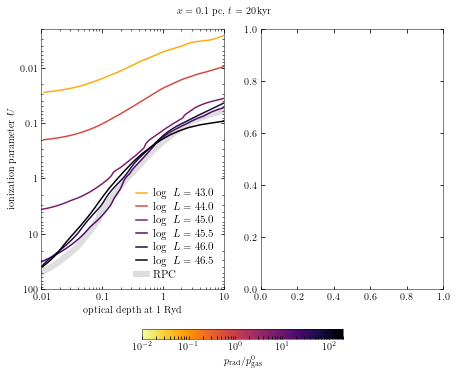

In [124]:
reload(plots)
plots.runsDir = '/home/jonathan/research/otherComputers/jose/simulations'
ix = 34
fn_static_solution = plots.rpc_hydro_dir + 'forCHIMES/static_solution.npz'
iTfunc=lambda iRunArray,iRun: [(20,200)[iRun in (0,4)], (20,200)[iRun>=4]][iRunArray] 
#iTfunc=lambda iRunArray,iRun: (20,200)[iRun==2]
plots.comparison_to_static_solution_by_radius(
    qs_by_L[1:7],qs_by_r[:-2][::-1],
    iTfunc,var='nH',rng=(10,1.5e5),ix=ix,
    static_solution_fn=fn_static_solution)
pl.savefig(plots.figdir+'comparison_to_static_solution_by_luminosity_and_radius.pdf',bbox_inches='tight')

1.8 1.0 B2D_N1024_R100_607D
1.3 0.9 B2D_N1024_R100_600DL
0.8 0.7 B2D_N1024_R100_608D
0.3 0.6 B2D_N1024_R100_603D
-0.7 0.3 B2D_N1024_R100_602D
-1.7 0.0 B2D_N1024_R100_601DL


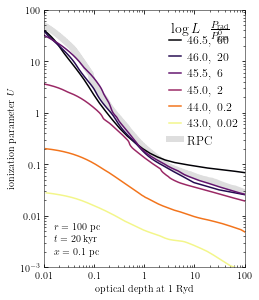

In [179]:
reload(plots)
plots.runsDir = '/home/jonathan/research/otherComputers/jose/simulations'
ix = 34
fn_static_solution = plots.rpc_hydro_dir + 'forCHIMES/static_solution.npz'
iTfunc=lambda iRun: (20,200)[iRun in (5,1)]
plots.comparison_to_static_solution_by_L(
    qs_by_L[1:7][::-1],
    iTfunc,var='nH',rng=(10,1.5e5),ix=ix,
    static_solution_fn=fn_static_solution)
pl.savefig(plots.figdir+'comparison_to_static_solution_by_luminosity.pdf',bbox_inches='tight')

-1.7 0.2 B2D_N1024_R100_601DL
-0.7 0.4 B2D_N1024_R100_602D
0.3 0.7 B2D_N1024_R100_603D
0.8 0.8 B2D_N1024_R100_608D
1.3 0.9 B2D_N1024_R100_600DL
1.8 1.0 B2D_N1024_R100_607D
-1.7 0.2 B2D_N1024_R3000_600D
-0.7 0.4 B2D_N1024_R1000_600D
-0.3 0.5 B2D_N1024_R600_600D
0.3 0.7 B2D_N1024_R300_600D
1.3 0.9 B2D_N1024_R100_600DL
1.7 1.0 B2D_N1024_R60_600D


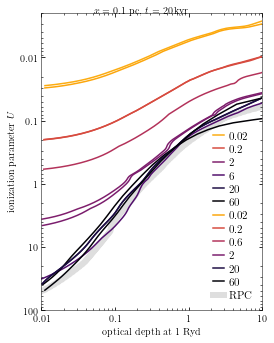

In [123]:
reload(plots)
plots.runsDir = '/home/jonathan/research/otherComputers/jose/simulations'
ix = 34
fn_static_solution = plots.rpc_hydro_dir + 'forCHIMES/static_solution.npz'
iTfunc=lambda iRun: (20,200)[iRun in (0,4,10,11)]
plots.comparison_to_static_solution_by_Xi(
    qs_by_L[1:7]+qs_by_r[:-2][::-1],
    iTfunc,var='nH',rng=(10,1.5e5),ix=ix,
    static_solution_fn=fn_static_solution)
#pl.savefig(plots.figdir+'comparison_to_static_solution_by_luminosity_and_radius.pdf',bbox_inches='tight')

# resolution test

In [170]:
names = ['B2D_N512_R100_600D','B2D_N1024_R100_600DL','B2D_N2048_R100_600D','B2D_N4096_R100_600D']
sim_data_names = [proj.runsDir+names[i]+'/data/' for i in range(len(names))]
res = [float(name.split('_')[1][1:]) for name in names]
nSnapshots = [None]*len(names)
for i in range(len(names)):
    if os.path.exists(sim_data_names[i]):
        nSnapshots[i] = max([int(fn.split('.')[1]) for fn in glob.glob(sim_data_names[i]+'prs*')])
[(sim_data_names[i].split('/')[-3],res[i],nSnapshots[i]) for i in range(len(names))]

[('B2D_N512_R100_600D', 512.0, 50),
 ('B2D_N1024_R100_600DL', 1024.0, 630),
 ('B2D_N2048_R100_600D', 2048.0, 470),
 ('B2D_N4096_R100_600D', 4096.0, None)]

In [171]:
reload(proj)
qs_by_res = [proj.Run(names[i],nSnapshots[i],r=100,v0=un.pc.to('cm')/un.yr.to('s'),L0=un.pc.to('cm'),
           rho0=1e-20,L=9.570e+45,optFrac=param.ion_fraction,
              f_abundances=f_abundances) for i in range(len(names)) if os.path.exists(sim_data_names[i])]

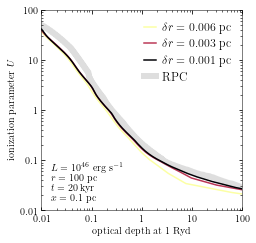

In [181]:
reload(plots)
plots.runsDir = '/home/jonathan/research/otherComputers/jose/simulations'
ix = 34
fn_static_solution = plots.rpc_hydro_dir + 'forCHIMES/static_solution.npz'
iTfunc=lambda iRun: (20,200)[iRun in (1,2)]
plots.comparison_to_static_solution_by_res(
    qs_by_res,
    iTfunc,var='nH',rng=(10,1.5e5),ix_base=ix,
    static_solution_fn=fn_static_solution)
pl.savefig(plots.figdir+'comparison_to_static_solution_by_resolution.pdf',bbox_inches='tight')

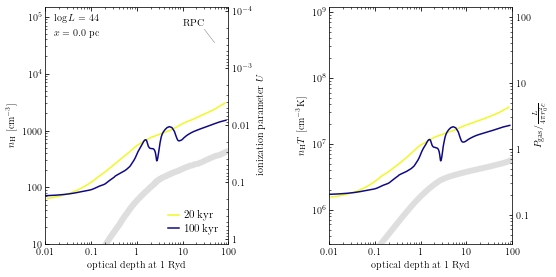

In [66]:
reload(plots)
ix = 5
fn_static_solution = plots.rpc_hydro_dir + 'forCHIMES/static_solution.npz'
plots.comparison_to_static_solution_by_time(
    qs_by_L[2],iTs=(20,100),var=('nH','nHT'),ix=ix,
    static_solution_fn=fn_static_solution)

loading snapshot #50
loading snapshot #100


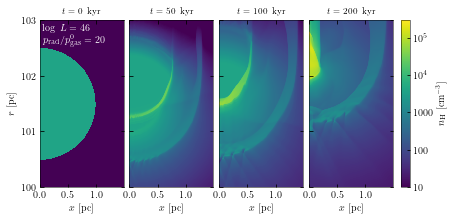

In [169]:
#reload(plots); plots.labelsize(False)
iSnapshots = np.array([0,50,100,200])
cb = plots.sim_evolution(qs_by_res[:1],iSnapshots,'nH',rng=(10,3e5),cmap=plots.density_cmap)    

In [34]:
q.Prad()

<Quantity 2.66796594e-06 erg / (cm2 m)>

In [32]:
pdb.pm()

> /home/jonathan/rpc_hydro/pysrc_new/plots.py(223)comparison_to_static_solution_by_time()
-> ax2.set_ylim(*((run.n_gamma().value/rng)))
(Pdb) p rng
(10, 150000.0)
(Pdb) q


In [26]:
qs_by_L[5].n_gamma()

<Quantity 1256.30602568 1 / cm3>

In [29]:
10**plots.lng*100

1312.7544677938931

# load different n_0 sims

In [67]:
names = ('B2D_N1024_R100_640D','B2D_N1024_R100_641D','B2D_N1024_R100_600DL','B2D_N1024_R100_642D','B2D_N1024_R100_643D')
sim_data_names = [proj.runsDir+names[i]+'/data/' for i in range(len(names))]
nSnapshots = [None]*len(names)
for i in range(len(names)):
    if os.path.exists(sim_data_names[i]):
        nSnapshots[i] = max([int(fn.split('.')[1]) for fn in glob.glob(sim_data_names[i]+'prs*')])
[(sim_data_names[i].split('/')[-3],nSnapshots[i]) for i in range(len(names))]

[('B2D_N1024_R100_640D', 157),
 ('B2D_N1024_R100_641D', 199),
 ('B2D_N1024_R100_600DL', 630),
 ('B2D_N1024_R100_642D', 97),
 ('B2D_N1024_R100_643D', 56)]

In [68]:
reload(proj)
qs_by_rho = [proj.Run(names[i],nSnapshots[i],r=100.,v0=un.pc.to('cm')/un.yr.to('s'),L0=un.pc.to('cm'),
           rho0=1e-20,L=9.570e+45,optFrac=param.ion_fraction,
              f_abundances=f_abundances) for i in range(len(names)) if os.path.exists(sim_data_names[i])]

loading snapshot #0
loading snapshot #0
loading snapshot #0
loading snapshot #0
loading snapshot #0


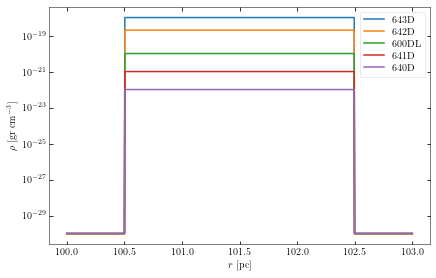

In [69]:
iT = 0; ix = 34
for iq,q in enumerate(qs_by_rho[::-1]):
    pl.plot(q[iT].r.cgs(),q[iT].rho.cgs()[:,34],label=q.name.split('_')[-1])
pl.legend()
pl.ylabel(q[iT].rho)
pl.xlabel(q[iT].r)
#pl.plot(q[345].r.cgs(),q.n_gamma()/q[345].nH.cgs()[:,17])
#pl.xlim(101,101.5)
pl.semilogy()
#pl.ylim(1e-2,1e8)
#.n_gamma()
pl.savefig(plots.figdir+'initial_densities.pdf')

In [81]:
[(q.name,len(q)) for q in qs_by_rho]

[('B2D_N1024_R100_640D', 157),
 ('B2D_N1024_R100_641D', 199),
 ('B2D_N1024_R100_600DL', 630),
 ('B2D_N1024_R100_642D', 97),
 ('B2D_N1024_R100_643D', 56)]

(100.0, 100.8)
(100.0, 100.8)


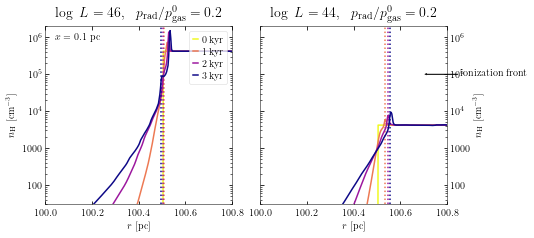

In [113]:
reload(plots)
iSnapshots = [0,1,2,3]
ix = 34
plots.skewers((qs_by_rho[-1],qs_by_L[2]),'r',('nH',),rngs=((30,2e6),(3e4,1e10)), iTs=iSnapshots,ix=ix,
              xls=(100.,100.8))

3.3 1.3 B2D_N1024_R100_640D
2.3 1.1 B2D_N1024_R100_641D
1.3 0.9 B2D_N1024_R100_600DL
0.0 0.6 B2D_N1024_R100_642D
-0.7 0.4 B2D_N1024_R100_643D


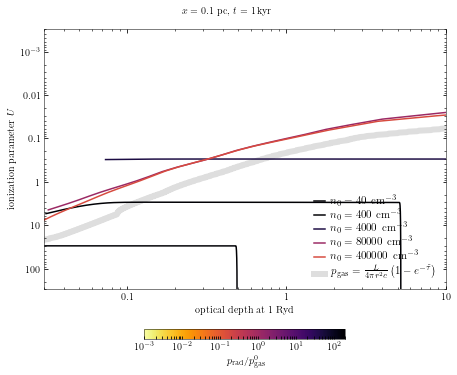

In [103]:
reload(plots)
plots.runsDir = '/home/jonathan/research/otherComputers/jose/simulations'
ix = 34
fn_static_solution = plots.rpc_hydro_dir + 'forCHIMES/static_solution.npz'
iTfunc=lambda iRun: 1
plots.comparison_to_static_solution_by_rho(
    qs_by_rho,
    iTfunc,var='nH',rng=(10,1.5e5),ix=ix,
    static_solution_fn=fn_static_solution)
#pl.savefig(plots.figdir+'comparison_to_static_solution_by_luminosity_and_radius.pdf',bbox_inches='tight')

In [99]:
q=qs_by_rho[-1]

In [102]:
q[1].tau_dust.cgs()[:,34].max()

4915.211202734017

loading snapshot #20
loading snapshot #20
loading snapshot #20
loading snapshot #20
loading snapshot #20


[]

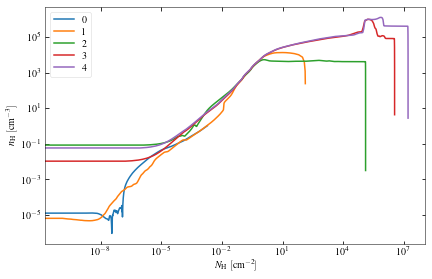

In [17]:
ix = 17
for iq,q in enumerate(qs_by_rho):
    iT = 20
    taus = q[iT].tau_HI.cgs()[:,ix] + q[iT].tau_dust.cgs()[:,ix]
    pl.plot(taus,q[iT].nH.cgs()[:,ix],label=iq)
pl.ylabel(q[iT].nH)
pl.xlabel(q[iT].NH)
pl.legend()a
#pl.xlim(101,101.5)
pl.loglog()
#pl.ylim(1e5,2e7)
#pl.savefig(plots.figdir+'R10000_density_plot.pdf')

In [118]:
sim_resolution = '1024'
sim_prefix = '420D'
Rs = 100,300,600,1000,3000,6000,10000
names = ['B2D_N%s_R%d_420D'%(sim_resolution,R) for R in Rs]
sim_data_names = [proj.runsDir+names[i]+'/data/' for i in range(len(names))]
qs2 = [proj.Run(names[i],21,r=R,v0=un.pc.to('cm')/un.yr.to('s'),L0=un.pc.to('cm'),
           rho0=1e-20,L=9.570e+45,optFrac=param.ion_fraction,
              f_abundances=f_abundances) for i,R in enumerate(Rs) if os.path.exists(sim_data_names[i])]


In [119]:
print(['%.1f'%log(q.r0) for q in qs2])

['20.5', '21.0', '21.3', '21.5', '22.0', '22.3', '22.5']


loading snapshot #20
loading snapshot #20


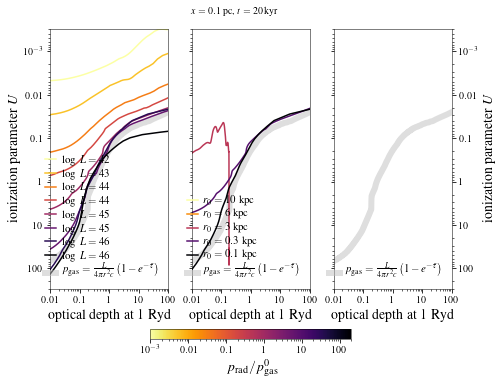

In [130]:
reload(plots)
plots.runsDir = '/home/jonathan/research/otherComputers/jose/simulations'

fn_static_solution = plots.rpc_hydro_dir + 'forCHIMES/static_solution.npz'
plots.comparison_to_static_solution_by_radius(
    qs,qs2[::-1][:3]+qs2[::-1][5:],[],iT=20,var='nH',rng=(10,1.5e5),ix=ix,
    static_solution_fn=fn_static_solution)
pl.savefig(plots.figdir+'comparison_to_static_solution_by_luminosity_and_radius.pdf',bbox_inches='tight')

IndexError: list index out of range

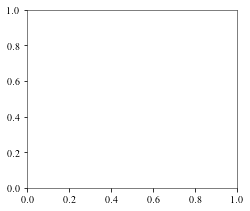

In [14]:
reload(plots)
fn_static_solution = plots.rpc_hydro_dir + 'forCHIMES/static_solution.npz'
plots.comparison_to_static_temperature_solution(
    qRP,iT=30,ix=10,
    static_solution_fn=fn_static_solution)
pl.xlim(0.001,100)

loading snapshot #2
loading snapshot #5
loading snapshot #2
loading snapshot #5
loading snapshot #2
loading snapshot #5
loading snapshot #2
loading snapshot #5
loading snapshot #2
loading snapshot #5
loading snapshot #2
loading snapshot #5


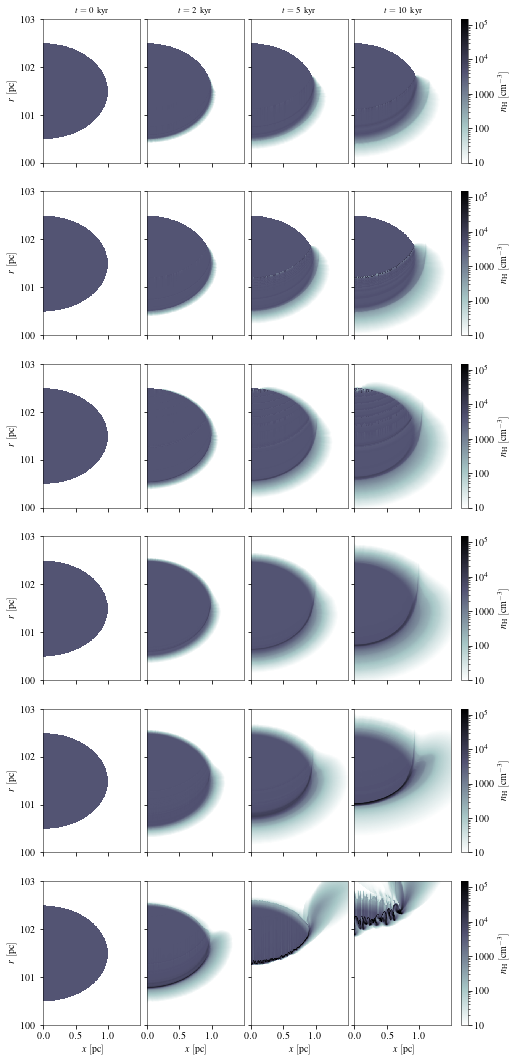

In [84]:
reload(plots)
iSnapshots = [0,2,5,10]
cb = plots.sim_evolution(sqs,iSnapshots,'nH',rng=(10,1.5e5),cmap=plots.density_cmap)    


(10, 1000000.0)

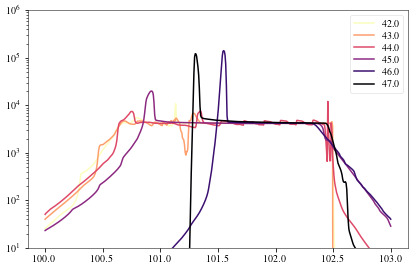

In [85]:
ix=10
for iq,run in enumerate(sqs):
    iT = (20,5)[iq==5]
    pl.plot(run[iT]['r'].cgs(),
            run[iT]['nH'].cgs()[:,ix],label='%.1f'%log(run.LAGN),c=plots.luminosity_cmap(iq/5))
pl.semilogy()
pl.legend()
pl.ylim(10,1e6)

In [10]:
qs = [proj.Run(names[i],nSnapshots[i]+1,r=100.,v0=un.pc.to('cm')/un.yr.to('s'),L0=un.pc.to('cm'),
           rho0=1e-20,L=lums[i],optFrac=param.ion_fraction,
              f_abundances=f_abundances) for i in range(len(lums))[:] if os.path.exists(sim_data_names[i])]


In [11]:
nSnapshots

[20, 20, 20, 20, 20, 20, 9, 9, None, None]

In [41]:
reload(proj)
iT = 9
res = proj.r_dependence_calc(qs,iTs=[iT])
# u.send(res,'pyobjs/dependence_on_r_new.pyobj')

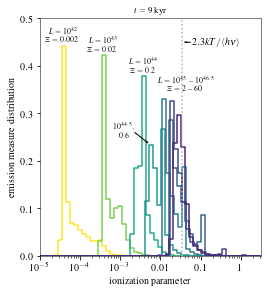

In [42]:
reload(plots)
plots.L_dependence_figs(qs,res,
                      save=False,
                     norm_by_Lbol=False,iT0=iT)
pl.savefig(plots.figdir+'luminosity_weighted_U.pdf',bbox_inches='tight')

/home/jonathan/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


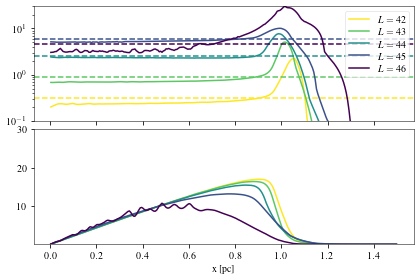

In [44]:
sqs = sorted(qs, key=lambda r: r.LAGN)
for iq,q in enumerate(sqs):
    c = plots.time_cmap(iq/4)
    snapshot = q[10]
    for iPanel in range(2):
        ax = pl.subplot(2,1,iPanel+1)
        if iPanel==0:
            pl.plot(snapshot.x.cgs(),snapshot.LOIII.cgs().sum(axis=0)/snapshot.LHb.cgs().sum(axis=0),c=c,label=r'$L=%.0f$'%log(q.LAGN))
            pl.legend()
            pl.axhline(snapshot.LOIII.cgs().sum()/snapshot.LHb.cgs().sum(),c=c,ls='--')
            pl.semilogy()
        if iPanel==1:
            pl.plot(snapshot.x.cgs(),snapshot.LHb.cgs().sum(axis=0)/snapshot.LHb.cgs().sum(axis=0)[80] * 10,c=c)            
        pl.xlabel(r'x [pc]')        
        pl.ylim(0.1,30)
        

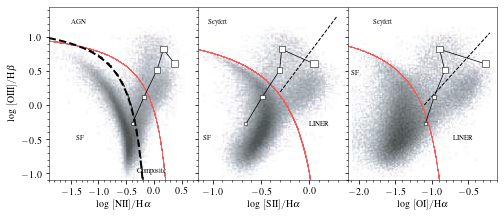

In [19]:
reload(plots)
plots.BPTplot_byL(qs)
pl.savefig(plots.figdir+'BPT.png',bbox_inches='tight',dpi=600)